# Import library

In [22]:
import gadget as gd
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as units
import matplotlib.style as style
import scipy.optimize
style.use('fivethirtyeight')   # El fondo coja todo el cuadro

# Extracción de datos ubicados en la carpeta Snapshots

In [23]:
filename='SNAPSHOTS/Dwarf1_snapshot_100.hdf5'
sn=gd.Snapshot(filename)

## Funciones  

### 1)  Cantidad de particulas por radio r 

In [24]:
def Part_Radio(r): 
    distancia=np.sqrt((sn.part1.pos**2).sum(axis=1))    # Cálculo de la distancia de las particulas
    cp=[]                                               
    for i in r:
        cp.append((distancia <= i).sum())  
    return cp

### 2) Diferencial de masa 

In [25]:
def Dif_Masa(masa):  
    difmasa=[]
    for i in range(np.shape(masa)[0]-1):
        difmasa.append(masa[i+1]-masa[i])
    difmasa=np.array(difmasa)
    difmasa=np.concatenate((masa[:1],difmasa))
    return difmasa


## variables globlales

In [48]:
dr=0.1
r=np.arange(dr,int(4)+dr,dr)

In [49]:
r

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. ])

Text(0,0.5,u'Mass [M_sun*1e10]')

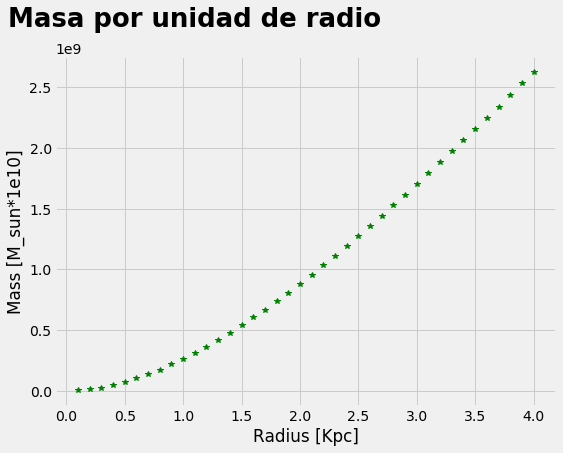

In [31]:
# Hacer el plot de masas_reales
cp = Part_Radio(r)
cp=np.array(cp)                        
masa=(cp*sn.masses[1])

fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
graph.text(x=-0.5,y=3*1e9,s='Masa por unidad de radio',fontsize=26, weight = 'bold')

plt.plot(r,masa*units.M_sun*1e10,'*',color="g")

graph.set_xlabel('Radius [Kpc]')
graph.set_ylabel('Mass [M_sun*1e10]')
#graph.legend(('dr = 0.1 Kpc', 'dr = 0.2 Kpc','dr = 0.4 Kpc'))

#plt.savefig("Masa_Real_dr.svg")

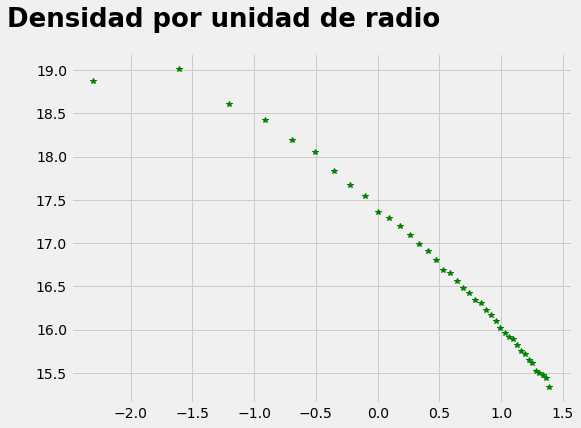

In [32]:
difmasa=Dif_Masa(masa)
rho=(difmasa*units.M_sun*1e10/dr*units.kpc)/(4*np.pi*(r*units.kpc)**2)

fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
graph.text(x=-3,y=19.5,s='Densidad por unidad de radio',fontsize=26, weight = 'bold')
plt.plot(np.log(np.array(r)),np.log(np.array(rho)),'*',color="g")


Text(0,0.5,u'Velocity [Km s^-1]')

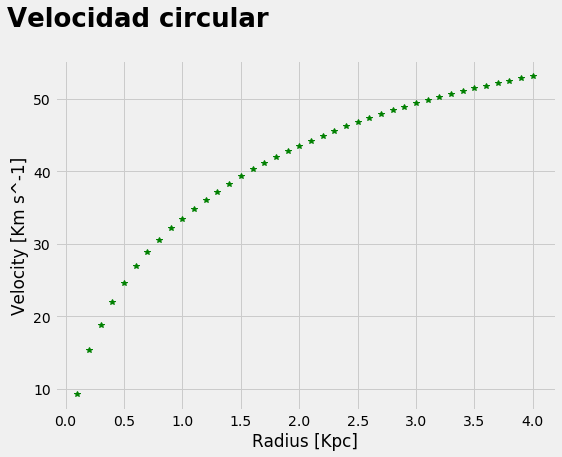

In [33]:
# Plot de velocidad
velcir=np.sqrt(const.G*masa*units.M_sun*1e10/(r*units.kpc)).to('km/s')

fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
graph.text(x=-0.5,y=60,s='Velocidad circular',fontsize=26, weight = 'bold')
plt.plot(r,velcir,'*',color="g")


graph.set_xlabel('Radius [Kpc]')
graph.set_ylabel('Velocity [Km s^-1]')
#graph.legend(('dr = 0.1 Kpc', 'dr = 0.2 Kpc','dr = 0.4 Kpc'))
#plt.savefig("vel_Real_dr.svg")

# Datos calculados

### Restricción del eje z,      -1 < z < 1 

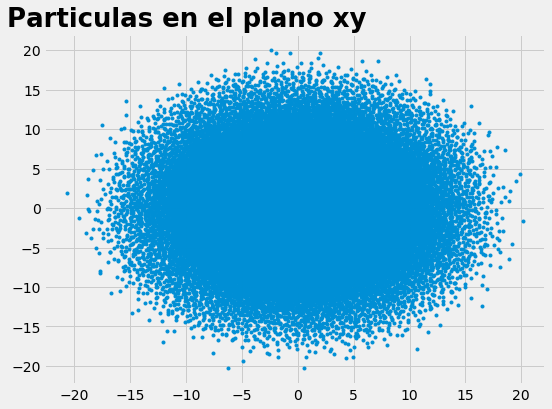

In [34]:
# Velocidad tangencial
x=[]
y=[]
condz = ((sn.part0.pos[:,2] <= 1) & (sn.part0.pos[:,2] >= -1)) 

x=sn.part0.pos[condz,0]   # Eliminando la restriccion 
y=sn.part0.pos[condz,1]   # Eliminando la restriccion 

fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
graph.text(x=-26,y=23,s='Particulas en el plano xy',fontsize=26, weight = 'bold')
plt.plot(x,y,'.')

In [35]:
vx=sn.part0.vel[condz,0]   # Eliminando la restriccion 
vy=sn.part0.vel[condz,1]   # Eliminando la restriccion 
unx=-y/(np.sqrt(x**2+y**2))
uny=x/(np.sqrt(x**2+y**2))

### Velocidad circular calculada 

Text(0,0.5,u'Velocity [Km s^-1]')

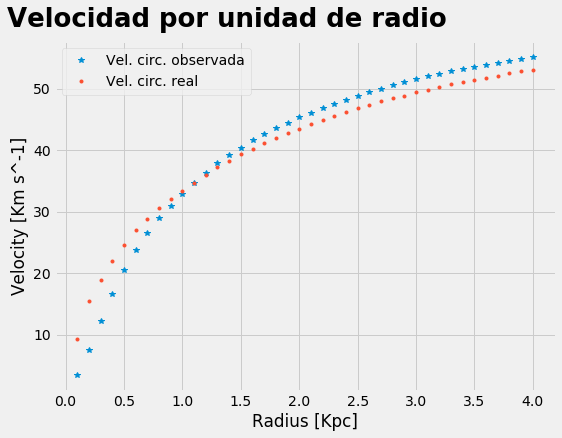

In [36]:
velcirc=[]   
for i in r:
    condr = ((x**2+y**2 <= i**2) & (x**2+y**2 >(i-dr)**2)) 
    velcirc.append(((vx*unx+vy*uny)*condr).sum()/(condr).sum())
velcirc=velcirc*units.km/units.s


fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
graph.text(x=-0.5,y=60,s='Velocidad por unidad de radio',fontsize=26, weight = 'bold')
plt.plot(r,np.abs(velcirc),'*',r,velcir,'.')
graph.legend(('Vel. circ. observada', 'Vel. circ. real'))
graph.set_xlabel('Radius [Kpc]')
graph.set_ylabel('Velocity [Km s^-1]')


Text(0,0.5,u'Mass [M_sun*1e10]')

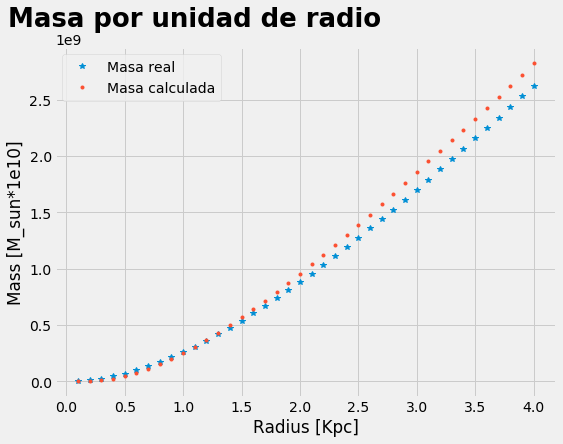

In [37]:
masa1=[]     #calculo de masa1

masa1=(((velcirc**2)*r*units.kpc)/const.G).to(units.M_sun)
masa1=np.array(masa1)

fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
graph.text(x=-0.5,y=3.15*1e9,s='Masa por unidad de radio',fontsize=26, weight = 'bold')
plt.plot(r,masa*units.M_sun*1e10,'*',r,masa1*units.M_sun,'.')
graph.legend(('Masa real', 'Masa calculada'))
graph.set_xlabel('Radius [Kpc]')
graph.set_ylabel('Mass [M_sun*1e10]')


Text(0.5,0,u'Radius [Kpc]')

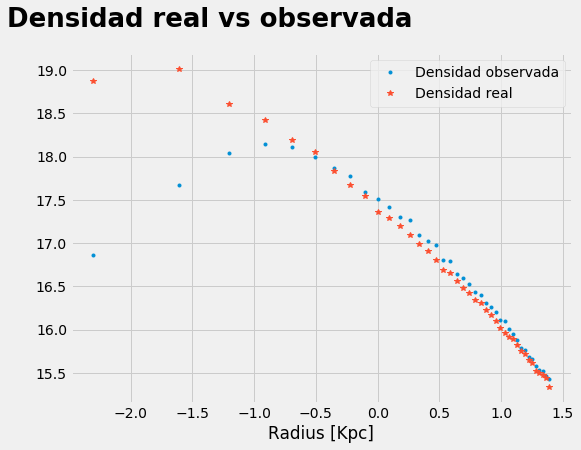

In [38]:
difmasa1=Dif_Masa(masa1)
rho1=(difmasa1/dr)/(4*np.pi*r**2)

fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
graph.text(x=-3,y=19.5,s='Densidad real vs observada',fontsize=26, weight = 'bold')
plt.plot(np.log(np.array(r)),np.log(np.array(rho1)),'.',np.log(np.array(r)),np.log(np.array(rho)),'*')
graph.legend(('Densidad observada', 'Densidad real'))
graph.set_xlabel('Radius [Kpc]')
#plt.savefig("densidad.svg")

## Restriccion de los 200 pc

In [39]:
cond_pc = (r > 0.2) 
cond_pc

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Text(0.5,0,u'Radius [Kpc]')

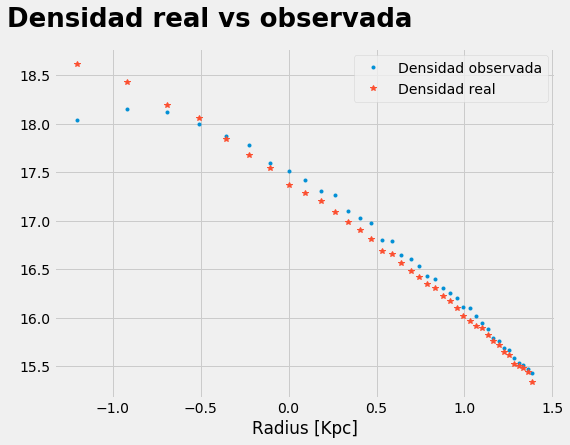

In [40]:

rho1_pc=rho1[cond_pc]
rho_pc=rho[cond_pc]
r_pc=r[cond_pc]

fig=plt.figure(figsize=(8,6))
graph=fig.add_subplot(111)
graph.text(x=-1.6,y=19,s='Densidad real vs observada',fontsize=26, weight = 'bold')
plt.plot(np.log(np.array(r_pc)),np.log(np.array(rho1_pc)),'.',np.log(np.array(r_pc)),np.log(np.array(rho_pc)),'*')
graph.legend(('Densidad observada', 'Densidad real'))
graph.set_xlabel('Radius [Kpc]')
#plt.savefig("curva_dr0.svg")

In [41]:
x=np.log(r_pc)
y=np.log(np.array(rho1_pc))
yr=np.log(np.array(rho_pc))

y

array([18.03959808, 18.15025172, 18.11591774, 17.99964241, 17.87356442,
       17.77760163, 17.59297704, 17.51515271, 17.41352704, 17.30720899,
       17.26857765, 17.09399807, 17.02300057, 16.97744771, 16.80406391,
       16.7879786 , 16.64356427, 16.60269141, 16.53107786, 16.43377767,
       16.39918554, 16.30823026, 16.25606252, 16.20154933, 16.10817264,
       16.09446961, 16.01290692, 15.94856049, 15.87800559, 15.78567016,
       15.76146533, 15.6855185 , 15.66584795, 15.57887253, 15.53111629,
       15.51637792, 15.46965034, 15.42943386])

## Ajuste de curva  

In [42]:
x=np.log(r_pc[:3])
y=np.log(np.array(rho1_pc[:3]))
yr=np.log(np.array(rho_pc[:3]))

In [43]:
p0 = [0,1]
errfunc         = lambda p: np.ravel(p[0]*x+p[1]-y)
fitparams       = scipy.optimize.leastsq(errfunc,p0,full_output=1)[0]
fitparams       = list(fitparams)
m = fitparams[0]
b = fitparams[1]

In [44]:
m

0.16050368366615356

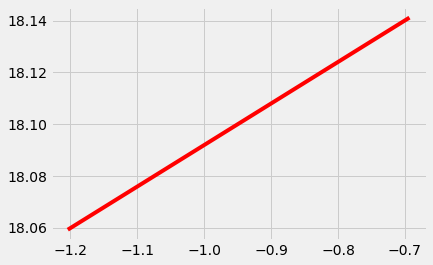

In [45]:
plt.plot(x,m*x+b,'-r')


In [66]:
f="gola.hdf5"

In [67]:
type(f)

str

In [70]:
f[-7:-5]

'la'